In [31]:
import numpy as np
import numpy.random
import os
from skimage import io
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from model.model import Net
import pandas as pd

images = []

names = os.listdir('Logos')

size = 500

for im in names[:size]:
    images.append(np.array(io.imread(f'Logos/{im}')))

images = np.array(images)

marks = np.random.randint(1,10,(size))
# zeros = torch.zeros(size=(size,10))
# for i in range(size):
#     zeros[i][marks[i]] = 1

x_tensor = torch.tensor(images, dtype=torch.float32)
x_tensor = torch.transpose(x_tensor,1,3)
y_tensor = torch.tensor(marks)
print(x_tensor.shape,y_tensor.shape)


torch.Size([500, 4, 400, 400]) torch.Size([500])


In [32]:

x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.25)

torch.Size([375, 4, 400, 400])


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [20:04<00:00, 12.05s/it]


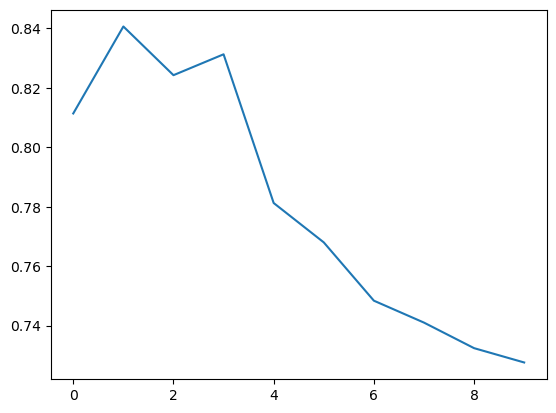

In [33]:
from tqdm import tqdm

class Model(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(Model, self).__init__()
        self.sq = nn.Sequential(
            nn.Conv2d(4,4,10),
            nn.ReLU(),
            nn.MaxPool2d(3,3),
            nn.Flatten(1),
            nn.Linear(16900,10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.sq(x)
        return x
    
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(4, 6, 5)
        self.pool = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(28224, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        x = F.relu(x)
        return x

    
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

losses = []

print(x_train.shape)
for epoch in tqdm(range(100)):
    optimizer.zero_grad()
    preds = model(x_train)
    # print('=====')
    # print(preds.shape,y_train.shape)
    loss = loss_fn(preds,y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # if epoch%1 == 0:
    #     print(loss.item())
    #     print(preds)


plt.plot(losses[-10:])
plt.show()

In [36]:
print(losses)

[2.6004908084869385, 2.7377984523773193, 2.3859682083129883, 2.3189444541931152, 2.267308235168457, 2.231748104095459, 2.2002193927764893, 2.173434257507324, 2.151292562484741, 2.14363694190979, 2.145758867263794, 2.1705029010772705, 2.188417434692383, 2.093989849090576, 2.0339694023132324, 2.0026330947875977, 1.9818195104599, 2.0201079845428467, 2.144695997238159, 2.010254383087158, 1.9095605611801147, 1.8805065155029297, 1.8832252025604248, 1.9415384531021118, 1.943302035331726, 1.9012835025787354, 2.0012753009796143, 2.0998244285583496, 1.975428819656372, 1.8949679136276245, 1.8436341285705566, 1.7786812782287598, 1.7274717092514038, 1.729630708694458, 1.7175310850143433, 1.809916615486145, 1.6967777013778687, 1.8735431432724, 2.0194246768951416, 1.883968472480774, 1.7785261869430542, 1.7352027893066406, 1.7005231380462646, 1.6964576244354248, 1.7034751176834106, 1.525950312614441, 1.4567077159881592, 1.4366695880889893, 1.5076518058776855, 1.4725815057754517, 1.6611113548278809, 1.

In [34]:
print(f"{losses[-1]}")
print(f'{F.cross_entropy(model(x_test), y_test)}')
print(f'{F.cross_entropy(model(x_tensor), y_tensor)}')

0.7276219725608826
2.6414568424224854
1.203658938407898


In [37]:
for i in model(x_test):
    print(i)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.2407, 0.0000, 0.0000, 0.6232, 0.0000,
        0.0000], grad_fn=<UnbindBackward0>)
tensor([0.0000, 3.3785, 0.0000, 0.0000, 0.5274, 0.0000, 0.0000, 0.5184, 0.0000,
        0.9496], grad_fn=<UnbindBackward0>)
tensor([0.0000, 1.3957, 0.0000, 1.1733, 0.4456, 0.0000, 0.0000, 1.1785, 0.0000,
        0.0000], grad_fn=<UnbindBackward0>)
tensor([0.0000, 0.9288, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<UnbindBackward0>)
tensor([0.0000, 0.6721, 0.0000, 3.8570, 3.5126, 0.0000, 0.0000, 2.1290, 0.0000,
        0.0000], grad_fn=<UnbindBackward0>)
tensor([0.0000, 0.2551, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9639, 0.0000,
        1.3174], grad_fn=<UnbindBackward0>)
tensor([0.0000, 0.0000, 1.6822, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<UnbindBackward0>)
tensor([0.0000, 3.2449, 0.0000, 0.0000, 1.1597, 0.0000, 0.0000, 0.0000, 0.0000,
        1.6435], grad_fn=<UnbindBackward0>)
tensor([